In [14]:
import pandas as pd
df = pd.read_csv('mark3_dataset.csv')
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       'Spectral Centroid', 'Spectral Roll-off', 'Zero Crossing Rate',
       'Delta MFCC Mean', 'Wavelet Mean', 'Wavelet STD', 'LPC Mean',
       'Chroma_0', 'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5',
       'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
       'Chroma_11', 'RMSE', 'Condition'],
      dtype='object')

**STATISTICAL DESCRIPTION**

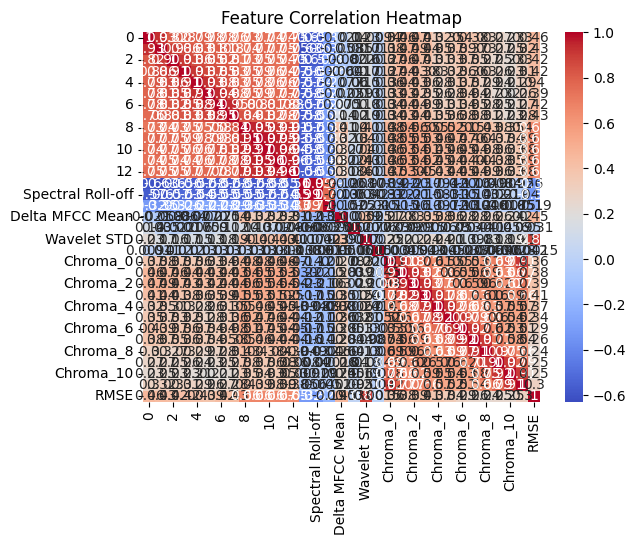

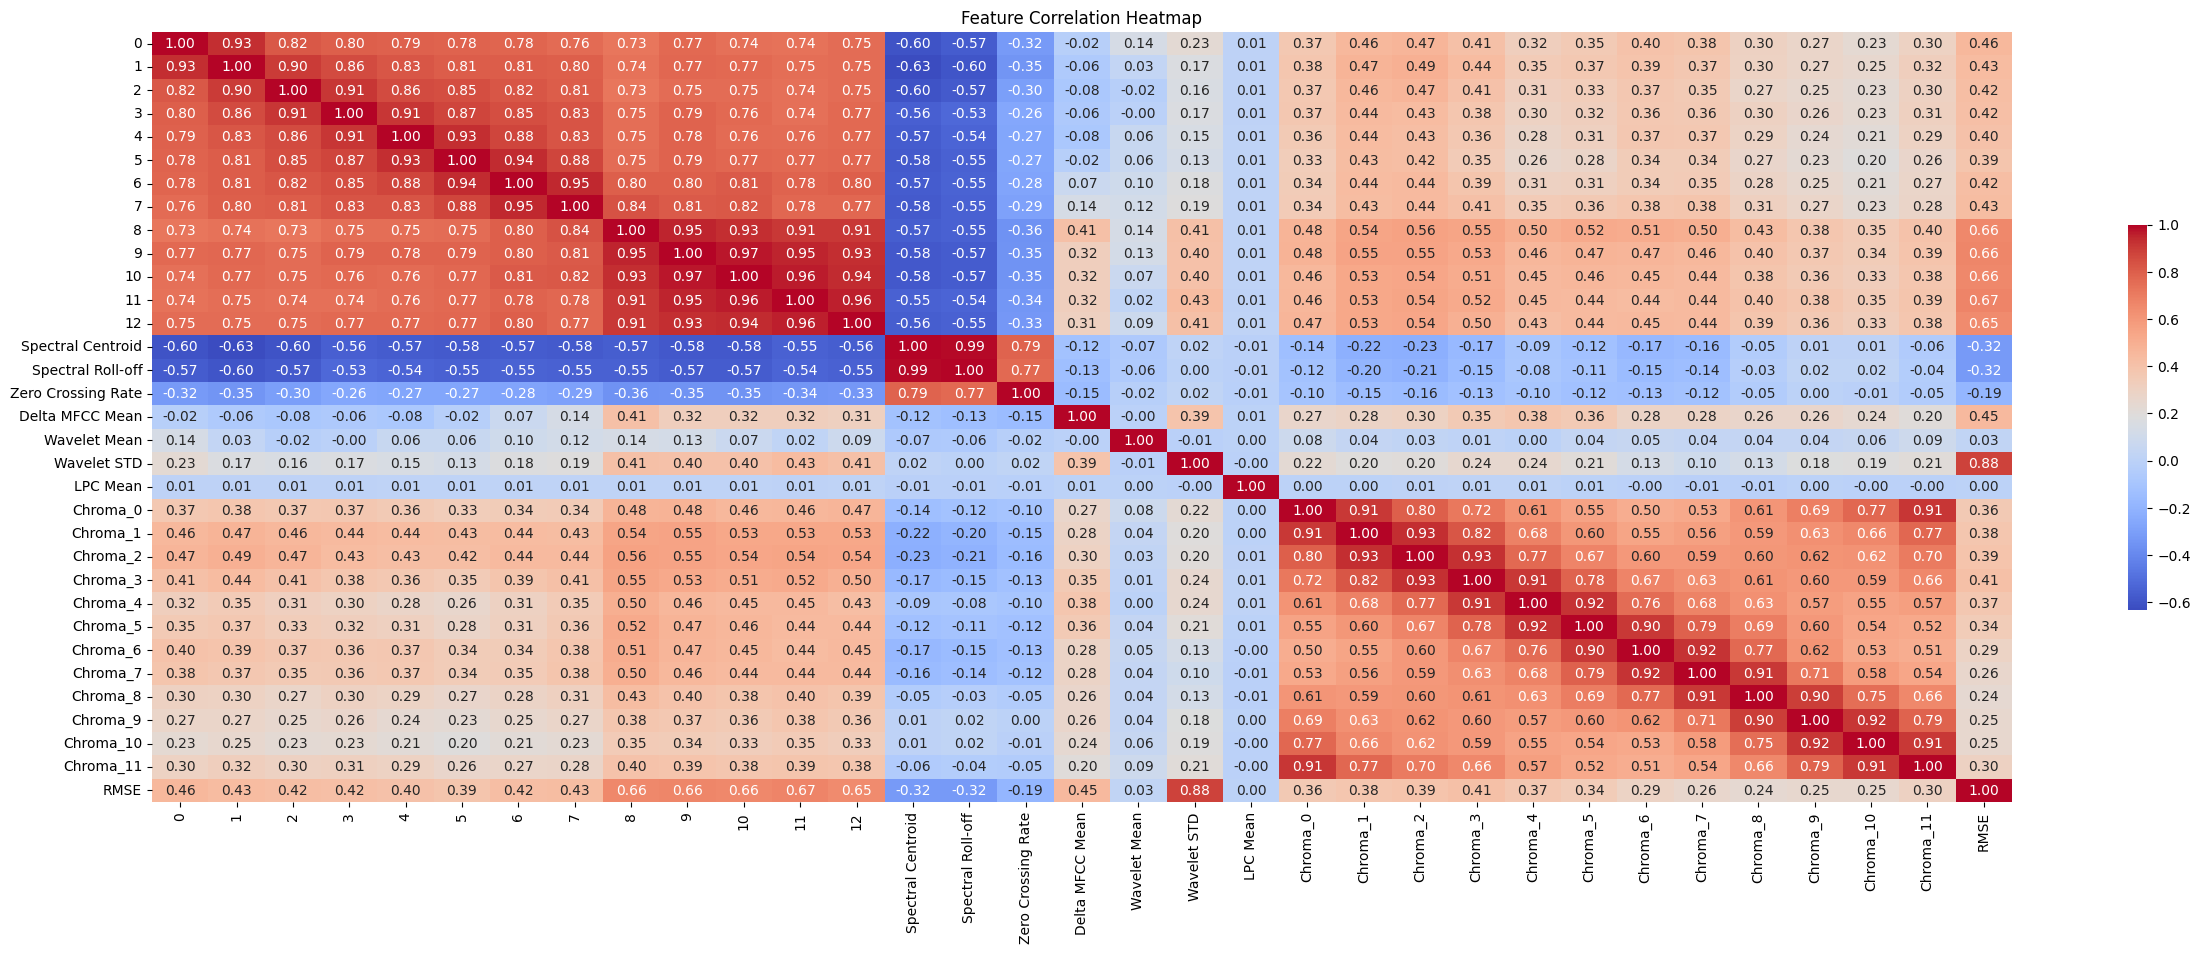

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_excluded_condition = df.drop(columns=['Condition'])
corr = df_excluded_condition.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.figure(figsize=(30, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Feature Correlation Heatmap')
plt.show()

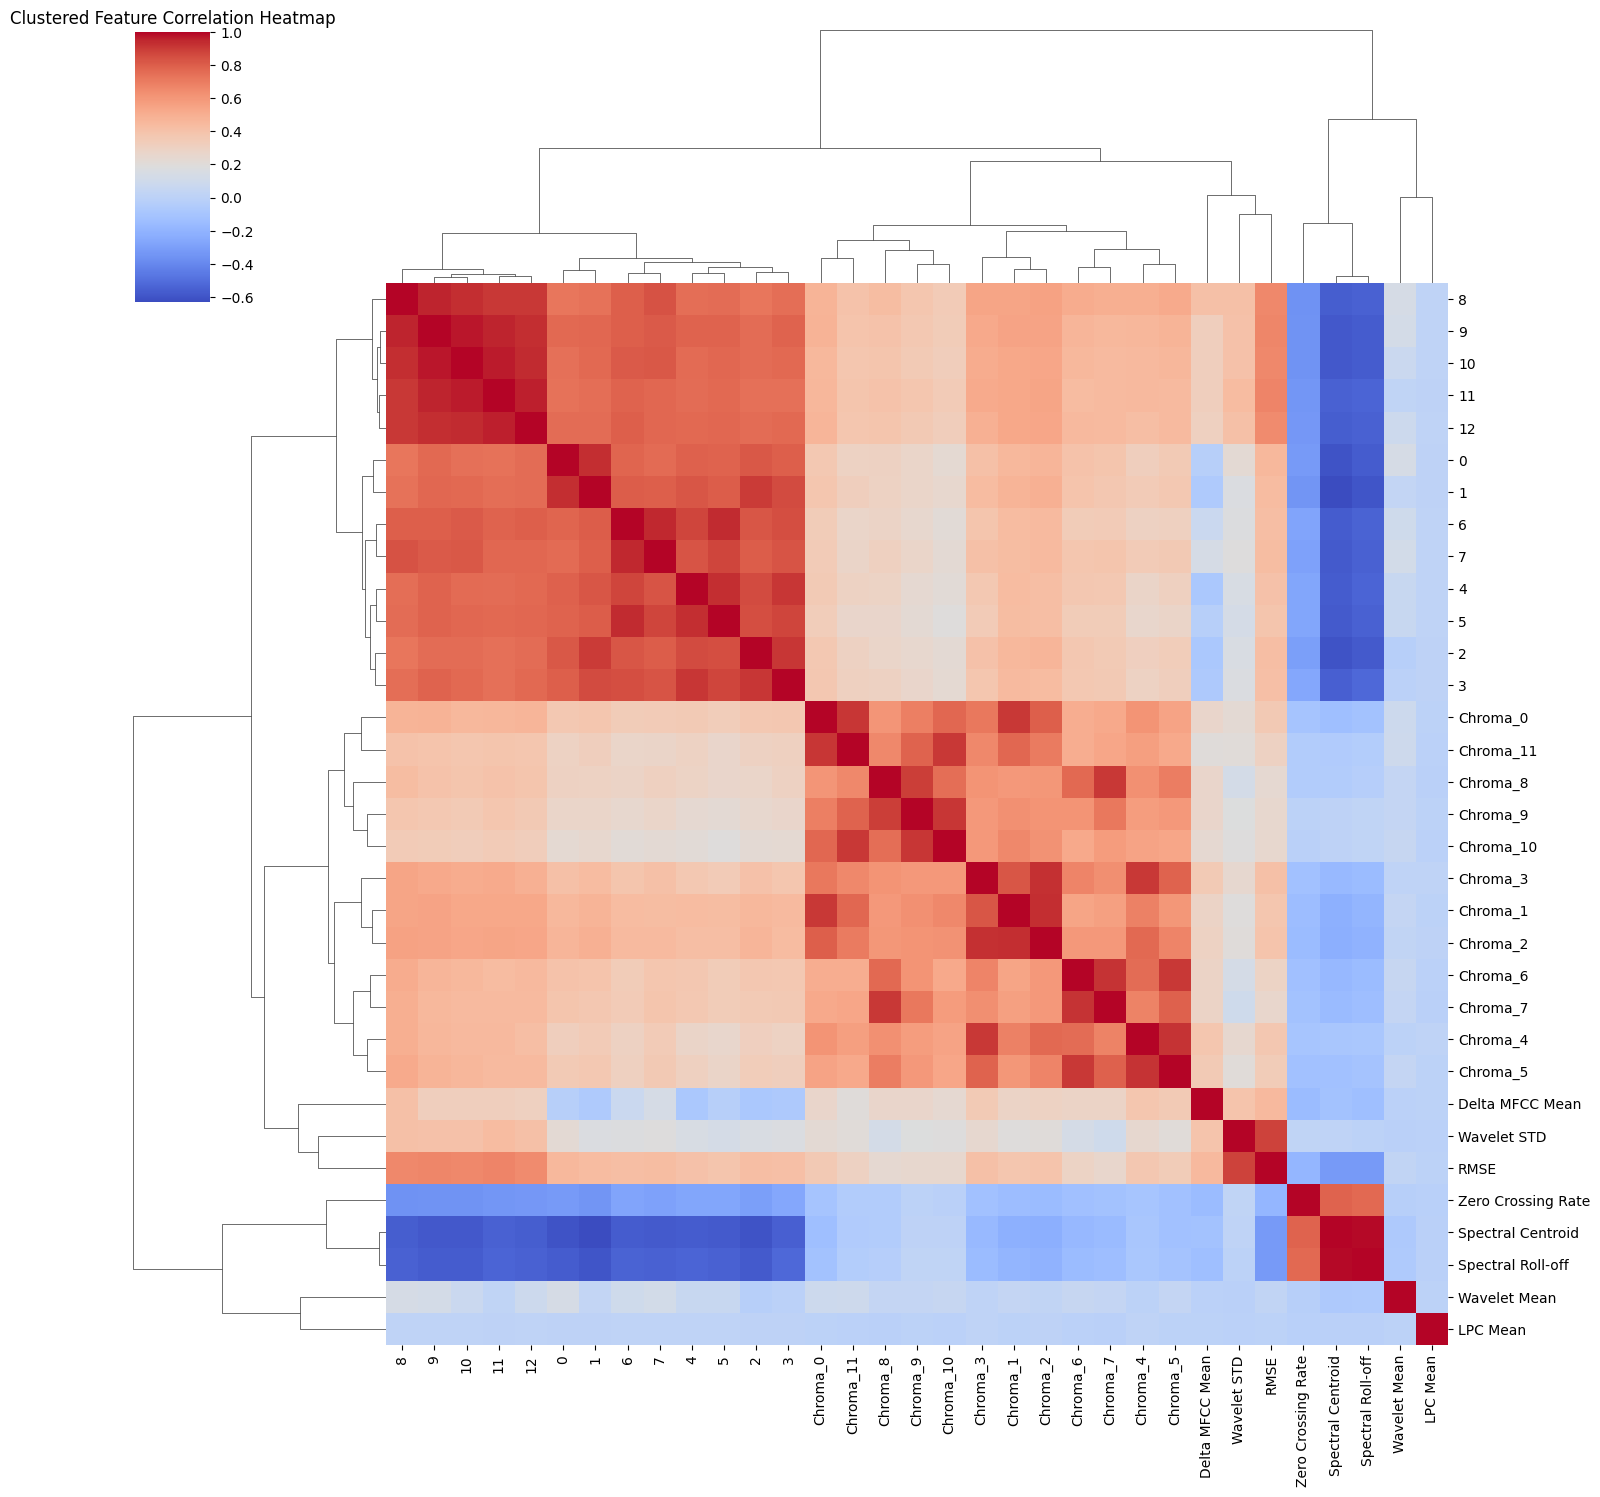

In [16]:
sns.clustermap(corr, figsize=(15, 15), cmap='coolwarm')
plt.title('Clustered Feature Correlation Heatmap')
plt.show()

from this we realize that there are some features are redudant (entire MFCC and chroma group)

so we will be using PCA (Principal Component Analysis) to combine MFCC and Chroma features

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mfcc_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
X_mfcc = df[mfcc_features]

X_mfcc_scaled = StandardScaler().fit_transform(X_mfcc)

pca_mfcc = PCA(n_components=1)
X_mfcc_pca = pca_mfcc.fit_transform(X_mfcc_scaled)

df['MFCC_PCA'] = X_mfcc_pca[:, 0]
df = df.drop(mfcc_features, axis=1)

chroma_features = ['Chroma_0', 'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11']
X_chroma = df[chroma_features]

X_chroma_scaled = StandardScaler().fit_transform(X_chroma)

pca_chroma = PCA(n_components=1)
X_chroma_pca = pca_chroma.fit_transform(X_chroma_scaled)

df['Chroma_PCA'] = X_chroma_pca[:, 0]
df = df.drop(chroma_features, axis=1)

In [18]:
df.head(5)

,Spectral Centroid,Spectral Roll-off,Zero Crossing Rate,Delta MFCC Mean,Wavelet Mean,Wavelet STD,LPC Mean,RMSE,Condition,MFCC_PCA,Chroma_PCA
0,123.565732,256.665559,0.025991,-0.004379,0.000274,0.076383,0.000156,0.062014,COPD,-3.644205,-3.816719
1,760.072546,930.826757,0.006823,0.031068,-0.000175,0.457004,0.000662,0.396840,COPD,-7.226640,-8.460301
2,144.922725,296.101360,0.031196,0.007727,0.000991,0.086049,2.482858,0.066346,COPD,-2.563580,-1.607422
3,90.437312,162.616356,0.025659,-0.005070,0.000607,0.083541,-13.272555,0.075274,COPD,-4.099734,-2.725410
4,114.007344,221.938776,0.029890,-0.004938,0.000245,0.059004,0.000102,0.049638,COPD,-4.200664,-1.338103


In [19]:
df_excluded_condition = df.drop(columns=['Condition'])

statistical_summary = df_excluded_condition.describe()
statistical_summary

,Spectral Centroid,Spectral Roll-off,Zero Crossing Rate,Delta MFCC Mean,Wavelet Mean,Wavelet STD,LPC Mean,RMSE,MFCC_PCA,Chroma_PCA
count,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03
mean,2099.157687,4004.591616,0.053931,0.001636,0.000017,9.215035e-02,-5.881918e+07,5.660848e-02,8.446273e-17,-5.630849e-17
std,1700.301504,3394.139174,0.037224,0.005371,0.000409,4.374483e-02,3.513229e+09,3.638148e-02,3.292605e+00,2.936631e+00
min,25.092213,48.708101,0.000013,-0.013371,-0.003412,6.236090e-07,-2.230397e+11,5.569651e-08,-1.326558e+01,-9.949183e+00
25%,141.014426,279.702514,0.028470,-0.000282,-0.000064,6.714894e-02,-1.079683e+00,3.566647e-02,-3.210639e+00,-1.861139e+00
50%,2264.130878,4096.498584,0.046175,0.000101,-0.000001,8.712747e-02,1.557024e-04,5.266863e-02,1.032158e+00,-1.849800e-01
75%,3183.750038,6140.264583,0.067191,0.002440,0.000071,1.082467e-01,5.101749e-03,7.007749e-02,2.322371e+00,1.608221e+00
max,13095.039315,20584.201389,0.531793,0.031068,0.003269,4.570044e-01,1.837469e+07,3.968397e-01,1.886487e+01,1.428946e+01


In [20]:
from scipy.stats import skew

variance_by_condition = df.groupby('Condition').var().transpose()

skewness_by_condition = df.groupby('Condition').apply(
    lambda x: x.drop('Condition', axis=1).apply(skew, bias=False)
).transpose()

In [21]:
variance_by_condition

Condition,COPD,asthma,healthy
Spectral Centroid,7.024800e+04,1.086697e+06,2.000864e+06
Spectral Roll-off,1.376231e+05,4.926461e+06,8.882406e+06
Zero Crossing Rate,8.139379e-05,1.120446e-03,1.858746e-03
Delta MFCC Mean,6.157195e-05,1.681750e-05,4.426178e-06
Wavelet Mean,4.719801e-07,5.468714e-09,2.104943e-08
Wavelet STD,2.681448e-03,1.166009e-03,1.888327e-03
LPC Mean,4.108244e+10,3.115059e+12,3.702596e+19
RMSE,1.908299e-03,5.027801e-04,8.165814e-04
MFCC_PCA,1.430573e+00,3.663375e+00,6.226204e+00
Chroma_PCA,4.382768e+00,3.794851e+00,1.107451e+01


In [22]:
skewness_by_condition

Condition,COPD,asthma,healthy
Spectral Centroid,4.026147,1.400791,1.426938
Spectral Roll-off,4.719693,1.568786,1.227670
Zero Crossing Rate,0.719528,3.387345,3.081343
Delta MFCC Mean,1.703834,0.965845,1.846726
Wavelet Mean,-1.114152,0.152448,9.250178
Wavelet STD,4.232143,0.668784,0.916679
LPC Mean,9.509733,-12.337071,-36.585667
RMSE,4.439049,0.958197,2.333961
MFCC_PCA,0.440372,0.021060,0.797790
Chroma_PCA,-1.826282,0.412284,0.808706


**Analytic Visualization**

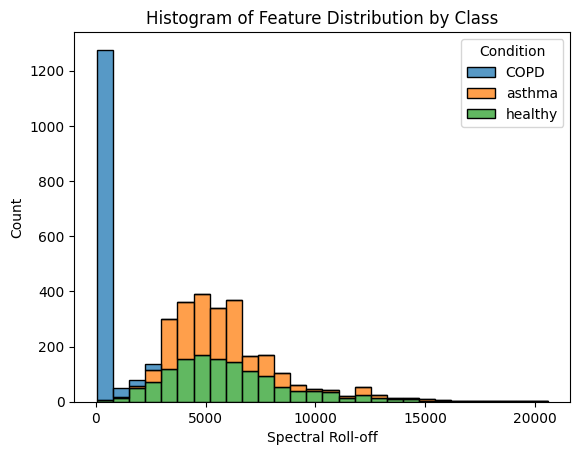

In [23]:
sns.histplot(data=df, x='Spectral Roll-off', hue='Condition', multiple='stack')
plt.title('Histogram of Feature Distribution by Class')
plt.xlabel('Spectral Roll-off')
plt.ylabel('Count')
plt.show()

**Spectral Roll-off:** The histogram shows a significant difference in the distribution of the spectral roll-off feature among the three conditions (COPD, asthma, and healthy). It indicates that this feature may play a role in differentiating between the conditions, especially since the COPD group shows a different distribution pattern compared to the asthma and healthy groups.

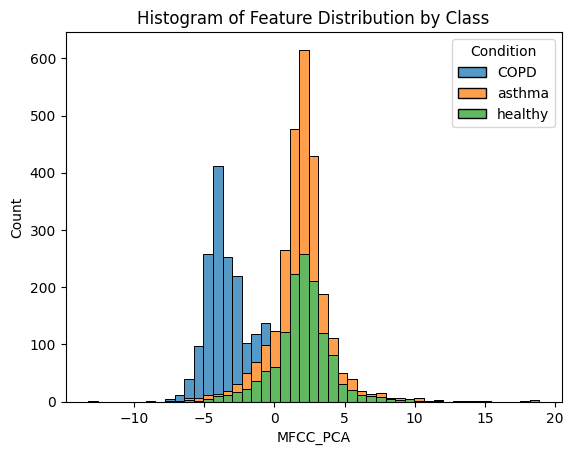

In [24]:
sns.histplot(data=df, x='MFCC_PCA', hue='Condition', multiple='stack')
plt.title('Histogram of Feature Distribution by Class')
plt.xlabel('MFCC_PCA')
plt.ylabel('Count')
plt.show()

**MFCC_PCA:** The distributions of the MFCC_PCA feature for the three conditions show overlap, but each condition has a peak in different ranges. This could imply that while there is some similarity in the MFCC_PCA values across the conditions, there are also distinct differences that could help in identifying the condition of a cough sound.

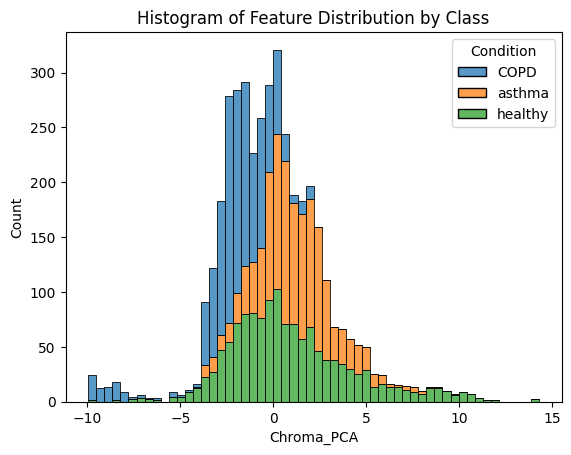

In [25]:
sns.histplot(data=df, x='Chroma_PCA', hue='Condition', multiple='stack')
plt.title('Histogram of Feature Distribution by Class')
plt.xlabel('Chroma_PCA')
plt.ylabel('Count')
plt.show()

**Chroma_PCA:** Similar to the MFCC_PCA, the Chroma_PCA feature shows overlapping distributions with different peaks for each condition. However, the peaks are not as distinctly separated as in the MFCC_PCA feature, suggesting that while Chroma_PCA might contribute to distinguishing between conditions, it might not be as strong a feature on its own.

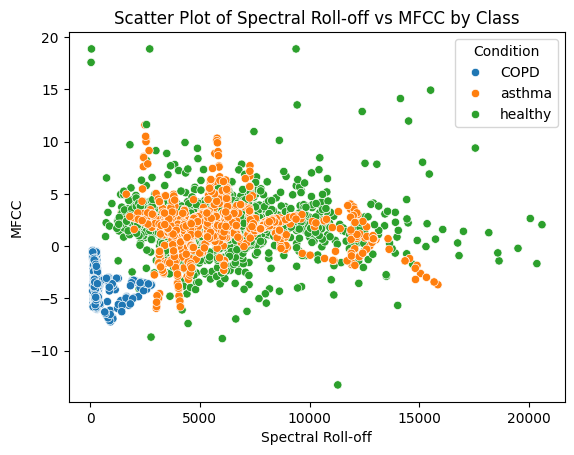

In [26]:
sns.scatterplot(data=df, x='Spectral Roll-off', y='MFCC_PCA', hue='Condition')
plt.title('Scatter Plot of Spectral Roll-off vs MFCC by Class')
plt.xlabel('Spectral Roll-off')
plt.ylabel('MFCC')
plt.show()

The scatter plot of Spectral Roll-off vs. MFCC for different conditions indicates significant overlap between the COPD, asthma, and healthy classes, with COPD cases tending to cluster towards lower values of both features.

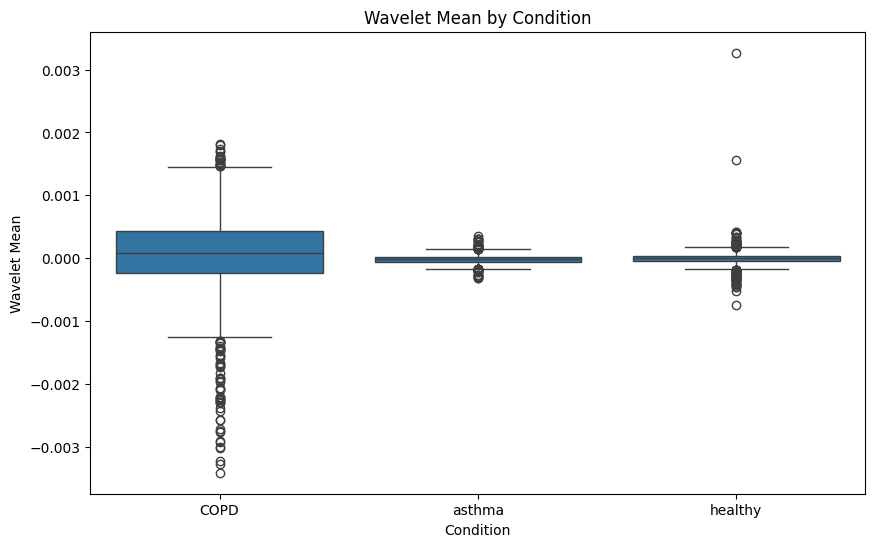

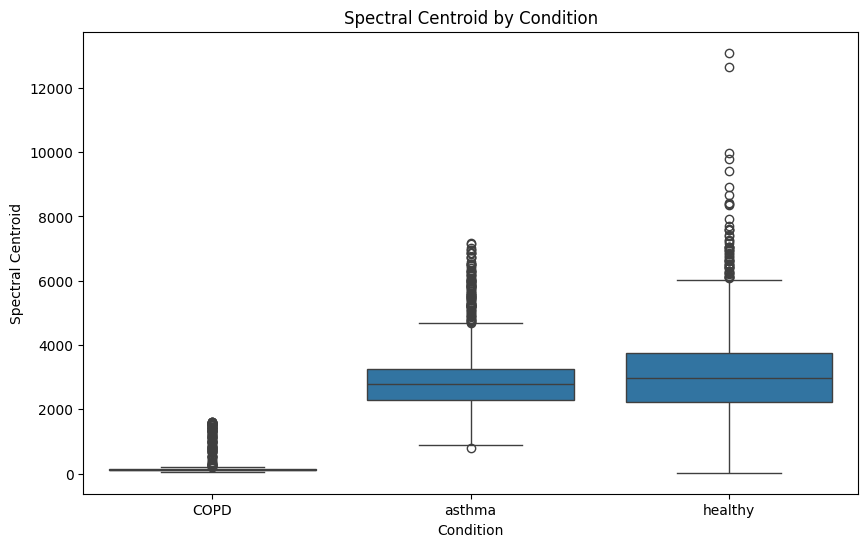

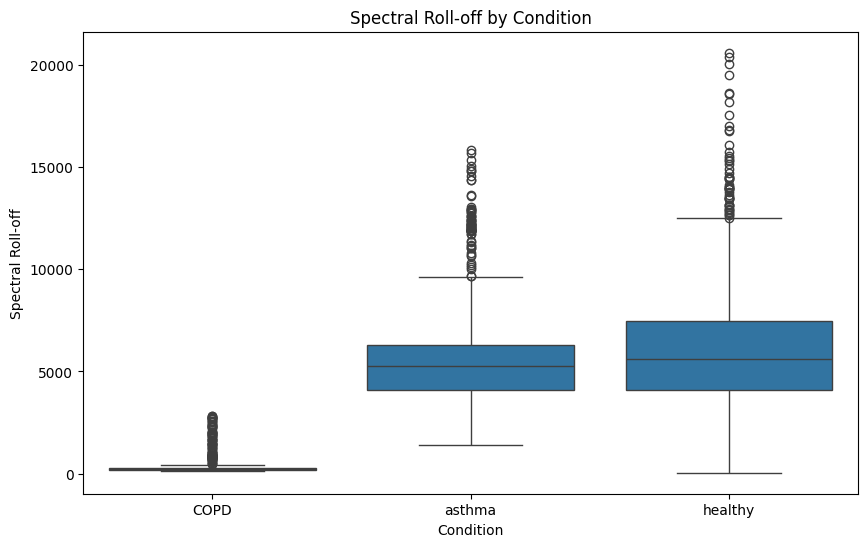

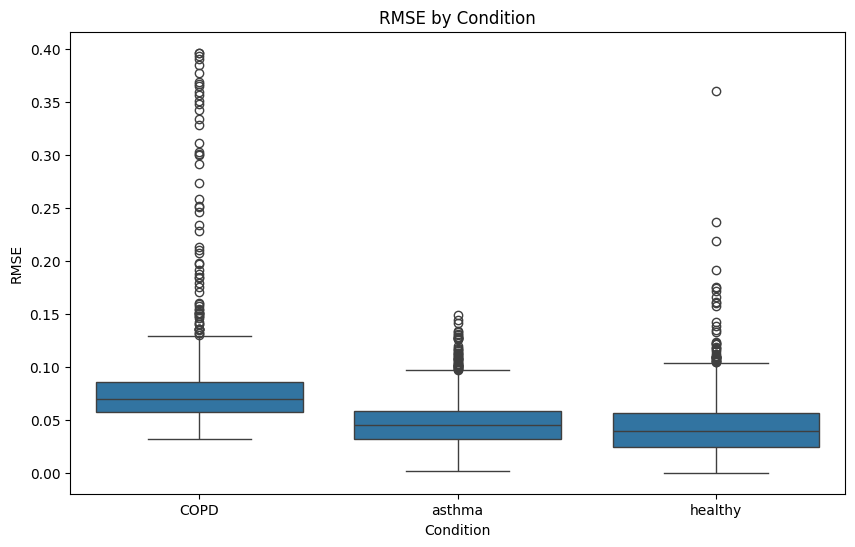

In [27]:
# Boxplots for features with high variance
for feature in ['Wavelet Mean', 'Spectral Centroid', 'Spectral Roll-off', 'RMSE']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Condition', y=feature)
    plt.title(f'{feature} by Condition')
    plt.show()

The **Wavelet Mean** plot suggests that the majority of COPD and healthy samples are closely grouped around a mean near zero, indicating a symmetry around this central value. In contrast, asthma samples appear more spread out, which could hint at a greater variability in this feature for asthma patients.

In the **Spectral Centroid** plot, healthy samples show a broad range of values with a higher median compared to COPD and asthma, suggesting more variation in the frequencies present in their respiratory sounds. The centroid for COPD samples is consistently lower, perhaps indicative of less frequency variation in their respiratory sounds.

The **Spectral Roll-off** follows a similar pattern to the Spectral Centroid, where healthy samples have a wider distribution of values. This measure typically reflects the frequency below which a certain percentage of the total spectral energy is contained. A higher roll-off value for healthy samples might reflect a richer or higher-frequency content in their respiratory sounds.

The box plot suggests that the **RMSE** is generally lowest for the 'healthy' condition and similar between 'COPD' and 'asthma' conditions. The spread of RMSE values is greatest for 'COPD', indicating more variability in the model's performance for this condition. Outliers are present in all three conditions, with 'healthy' having the fewest, suggesting that the model's predictions are most consistent for the 'healthy' group.

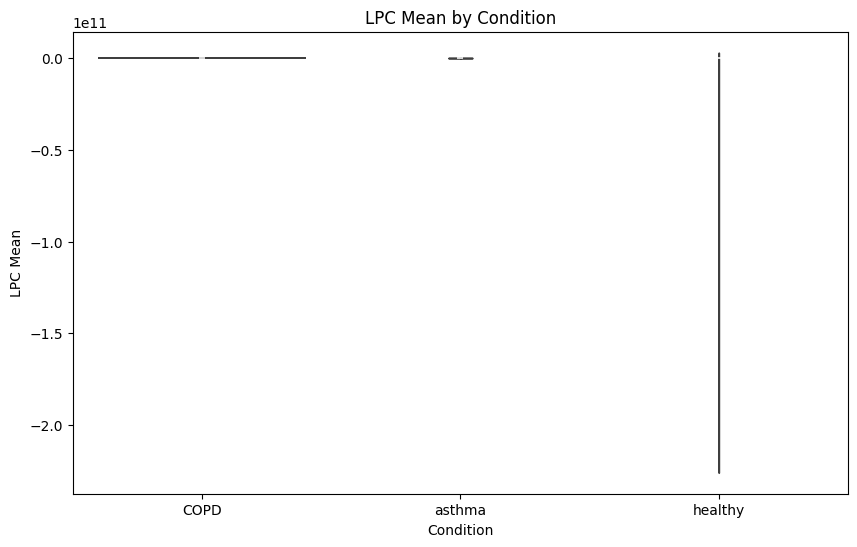

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Condition', y='LPC Mean')
plt.title('LPC Mean by Condition')
plt.show()

The violin plot for **LPC Mean** indicates a stark difference in the distribution of this feature among the different conditions. For healthy individuals, the LPC Mean values are highly concentrated around a narrower range, signifying less variability within the healthy group. In contrast, for COPD and asthma conditions, the LPC Mean values are more spread out, indicating greater variability. The negative values and broad spread for COPD may suggest that this feature captures some aspect of respiratory function that is impacted by this condition.

**MODELS:**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df[['Spectral Centroid', 'Spectral Roll-off', 'Zero Crossing Rate',
        'Delta MFCC Mean', 'Wavelet Mean', 'Wavelet STD',
        'LPC Mean', 'RMSE', 'MFCC_PCA', 'Chroma_PCA']]
y = df['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8613861386138614
Classification Report:
              precision    recall  f1-score   support

        COPD       1.00      1.00      1.00       267
      asthma       0.77      0.81      0.79       261
     healthy       0.82      0.78      0.79       280

    accuracy                           0.86       808
   macro avg       0.86      0.86      0.86       808
weighted avg       0.86      0.86      0.86       808



**GBM**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbc)

print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier Accuracy: 0.8960396039603961
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

        COPD       1.00      1.00      1.00       267
      asthma       0.81      0.88      0.85       261
     healthy       0.88      0.81      0.84       280

    accuracy                           0.90       808
   macro avg       0.90      0.90      0.90       808
weighted avg       0.90      0.90      0.90       808



**LightGBM**

In [32]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier()

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Classifier Accuracy:", accuracy_lgb)

print("LightGBM Classifier Classification Report:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 3230, number of used features: 10
[LightGBM] [Info] Start training from score -1.096447
[LightGBM] [Info] Start training from score -1.090902
[LightGBM] [Info] Start training from score -1.108569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classifier Accuracy: 0.9306930693069307
LightGBM Classifier Classification Report:
              precision    recall  f1-score   support

        COPD       1.00      1.00      1.00       267
      asthma       0.88      0.91      0.89       261
     healthy       0.91      0.89      0.90       280

    accuracy                           0.93       808
   macro avg       0.93      0.

**Voting Ensemble**

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('svm', svm)], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9220297029702971
Voting Classifier Classification Report:
              precision    recall  f1-score   support

        COPD       1.00      1.00      1.00       267
      asthma       0.87      0.90      0.88       261
     healthy       0.90      0.87      0.89       280

    accuracy                           0.92       808
   macro avg       0.92      0.92      0.92       808
weighted avg       0.92      0.92      0.92       808



**Bigger Voting Ensemble**

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

models = [
    ("pca_lgbm", Pipeline([("pca", PCA()), ("lgbm", lgb.LGBMClassifier())])),
    ("std_scaler_lgbm", Pipeline([("std_scaler", StandardScaler()), ("lgbm", lgb.LGBMClassifier())])),
    ("robust_scaler_lgbm", Pipeline([("robust_scaler", RobustScaler()), ("lgbm", lgb.LGBMClassifier())])),
    ("std_scaler_rf", Pipeline([("std_scaler", StandardScaler()), ("rf", RandomForestClassifier())])),
    ("std_scaler_xgb", Pipeline([("std_scaler", StandardScaler()), ("xgb", xgb.XGBClassifier())])),
    ("std_scaler_svm", Pipeline([("std_scaler", StandardScaler()), ("svm", SVC(probability=True))])),
    ("max_abs_scaler_xgb", Pipeline([("max_abs_scaler", MaxAbsScaler()), ("xgb", xgb.XGBClassifier())])),
    ("max_abs_scaler_lgbm", Pipeline([("max_abs_scaler", MaxAbsScaler()), ("lgbm", lgb.LGBMClassifier())]))
]

voting_clf = VotingClassifier(estimators=models, voting="soft")

voting_clf.fit(X_train, y_train)

accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 3230, number of used features: 10
[LightGBM] [Info] Start training from score -1.096447
[LightGBM] [Info] Start training from score -1.090902
[LightGBM] [Info] Start training from score -1.108569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 3230, number of used features: 10
[LightGBM] [Info] Start training from score -1.096447
[LightGBM] [Info] Start training from score -1.090902
[LightGBM] [Info] Start training from score -1.108569
[LightGBM] [Warning] No f

**MS Azure Automated ML**

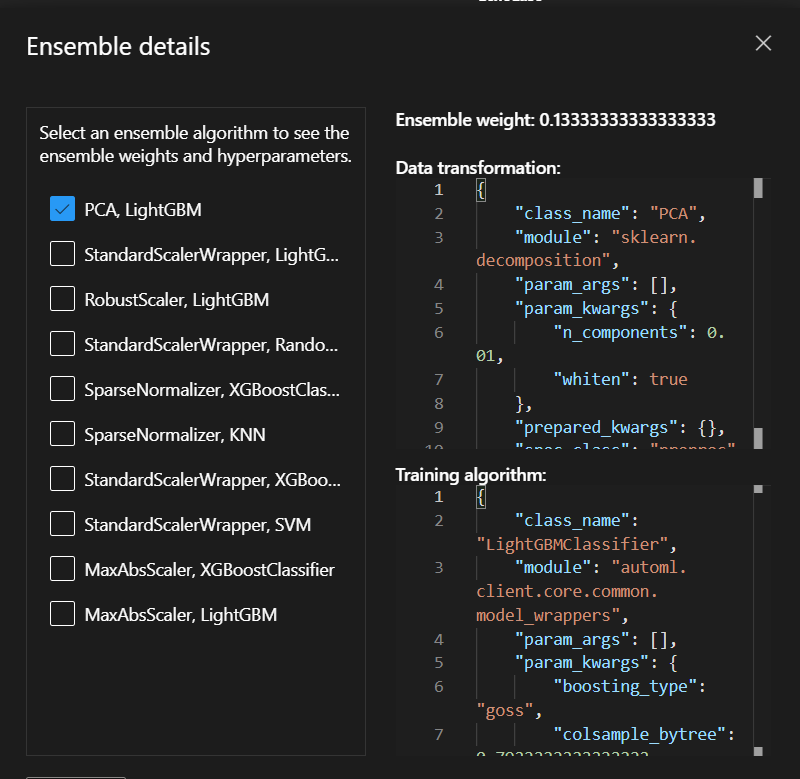

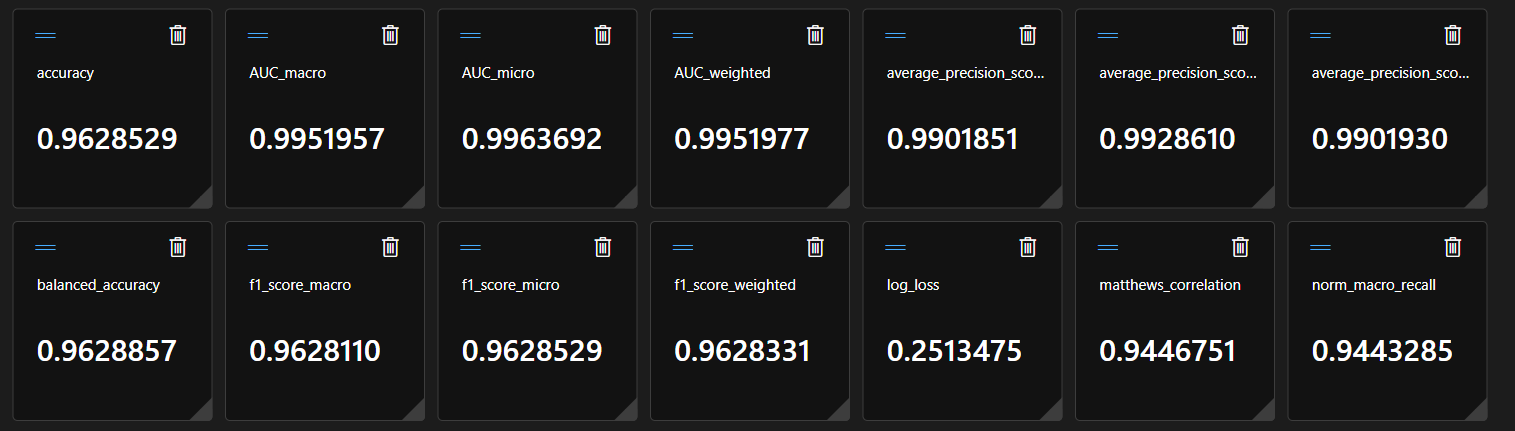

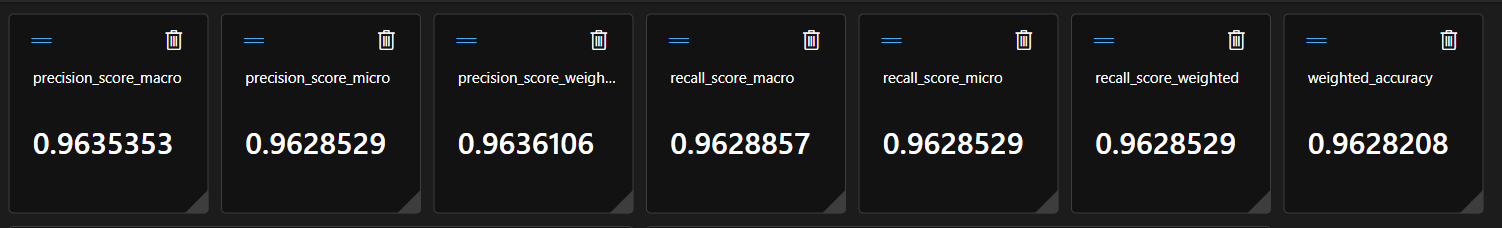

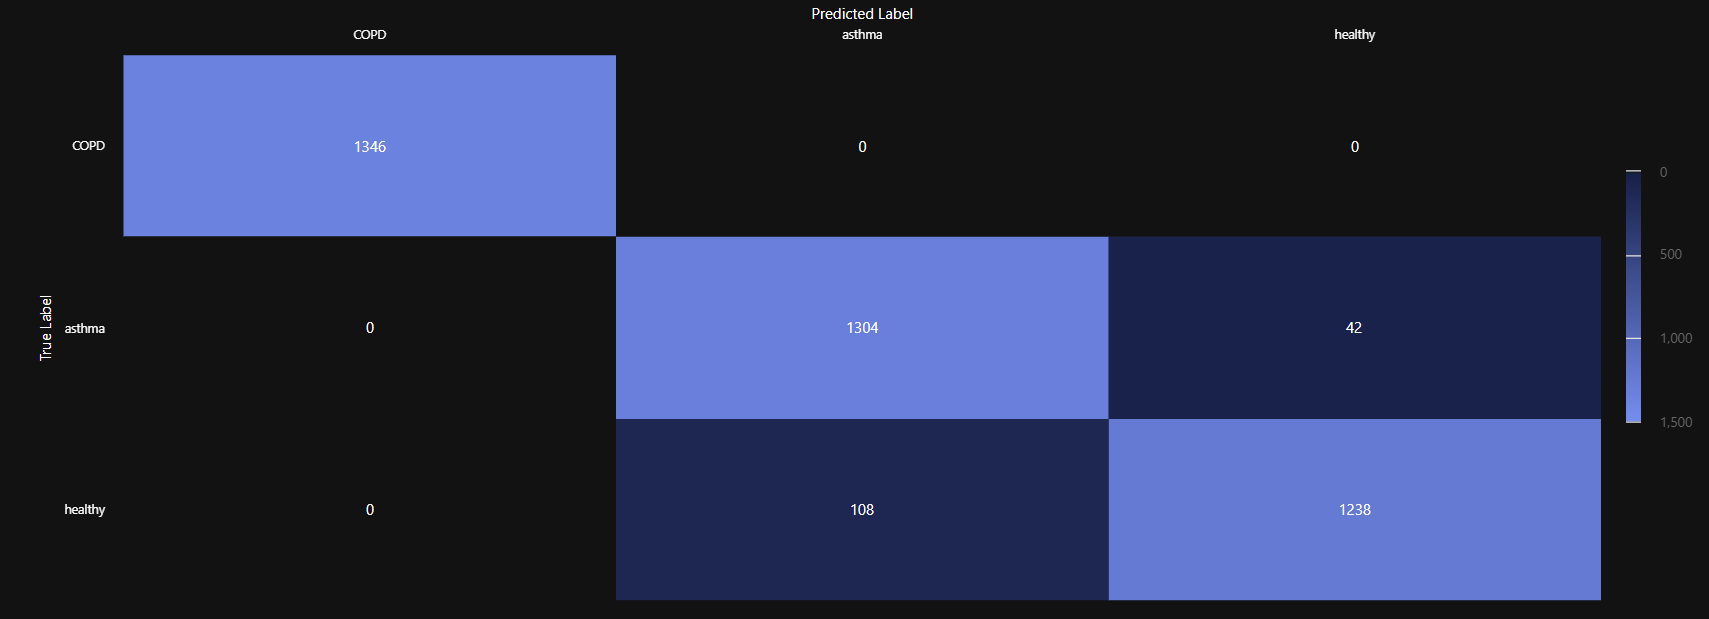